In [1]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image
from IPython.display import display

import sklearn.datasets as datasets
from sklearn.utils import shuffle

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
import scipy as sp
import scipy.cluster.vq
import scipy.spatial.distance
from scipy.spatial.distance import cdist, pdist

from sklearn.datasets import fetch_mldata, fetch_olivetti_faces
from sklearn.utils import shuffle 
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

import time
from collections import defaultdict

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
plt.set_cmap('jet')

In [27]:
def part1_plot_clustering(original_data, original_cluster_assignments, 
                              kmeanspp_cluster_assignments, kmeans_random_cluster_assignments):
    plt.figure()
    fig,axes = plt.subplots(1, 3, figsize=(15,4))
    
    #Change below: call scatter plot function on axes[0]
    axes[0].scatter(original_data[:,0], original_data[:,1], c=original_cluster_assignments)
    axes[0].set_title('Original')
    
    #Change below: call scatter plot function on axes[1]
    axes[1].scatter(original_data[:,0], original_data[:,1], c=kmeanspp_cluster_assignments)
    axes[1].set_title('Init=K-Means++')
    
    #Change below: call scatter plot function on axes[2]
    axes[2].scatter(original_data[:,0], original_data[:,1], c=kmeans_random_cluster_assignments)
    axes[2].set_title('Init=Random')

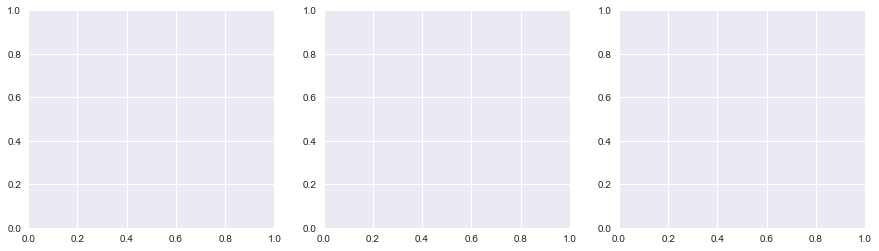

In [35]:
fig

In [29]:
#Create a dataset with 200 2-D points with 4 cluster with a standard deviation of 1.0
t1b_data, t1b_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0,
                                                 random_state=1234)

In [30]:
t1b_data

array([[-5.89877514,  3.83416161],
       [ 6.46258102, -5.59977575],
       [-5.40224226,  3.42709526],
       [-1.56500662,  5.08717859],
       [ 0.02694986,  4.25760507],
       [-6.04489804,  2.11938062],
       [ 5.38197068, -1.91035668],
       [-0.88188066,  5.69241956],
       [ 5.63139614, -3.20496544],
       [-6.15391462,  0.19949047],
       [ 5.82587939, -6.62676579],
       [ 4.19243162, -4.42136671],
       [-0.95706837,  4.65563274],
       [-0.56478922,  3.88867268],
       [-6.35271953,  3.50114461],
       [ 6.03978255, -3.85917604],
       [-1.77007257,  5.77904971],
       [-3.43799168,  4.29763975],
       [-4.13900737,  1.29954413],
       [-6.71785344,  2.29755591],
       [-3.91483747,  5.35556225],
       [ 0.87824667,  5.82944511],
       [ 6.01072018, -3.65738294],
       [-0.55134193,  6.38580135],
       [-4.40872645,  5.00992788],
       [-5.76415758,  2.73126736],
       [-1.31805353,  5.15656875],
       [-1.36717363,  8.0729403 ],
       [-5.53763155,

In [31]:
t1b_ground_truth

array([0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 3, 0, 0, 3, 1, 2,
       1, 3, 0, 1, 1, 0, 3, 2, 2, 0, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 2, 3, 2,
       1, 2, 2, 0, 1, 3, 3, 1, 3, 1, 2, 2, 2, 1, 0, 3, 3, 2, 3, 1, 2, 2, 3,
       3, 3, 0, 2, 3, 1, 0, 0, 0, 0, 2, 3, 0, 3, 3, 2, 0, 3, 3, 2, 0, 2, 3,
       0, 3, 2, 3, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 3, 0, 2, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 3, 1, 2, 1, 3, 3, 3, 2, 0, 0, 1, 3, 3, 1, 2,
       2, 2, 1, 3, 0, 1, 3, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0,
       1, 0, 3, 0, 3, 2, 1, 2, 2, 0, 1, 0, 2, 3, 2, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 3, 2, 0, 0, 1, 2, 3, 1, 3, 3])

In [32]:
t1b_kmeanspp = KMeans(n_clusters=4, init="k-means++", random_state=1234)
t1b_kmeanspp_cluster_assignments = t1b_kmeanspp.fit(t1b_data).labels_
t1b_kmeanspp_cluster_assignments

array([3, 0, 3, 2, 2, 3, 0, 2, 0, 3, 0, 0, 2, 2, 3, 0, 2, 1, 3, 3, 1, 2, 0,
       2, 1, 3, 2, 2, 3, 1, 0, 0, 3, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 3, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 3, 1, 1, 0, 1, 2, 0, 0, 2,
       1, 1, 3, 0, 1, 2, 3, 3, 3, 3, 0, 1, 3, 1, 1, 0, 3, 1, 1, 0, 3, 0, 1,
       3, 1, 0, 1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 3, 0, 3,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 3, 3, 2, 1, 2, 2, 0,
       0, 0, 1, 1, 3, 2, 1, 0, 2, 2, 3, 0, 2, 1, 0, 3, 0, 0, 1, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 0, 2, 0, 0, 3, 2, 3, 0, 1, 0, 3, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 0, 3, 2, 2, 1, 0, 3, 3, 2, 0, 1, 2, 1, 1], dtype=int32)

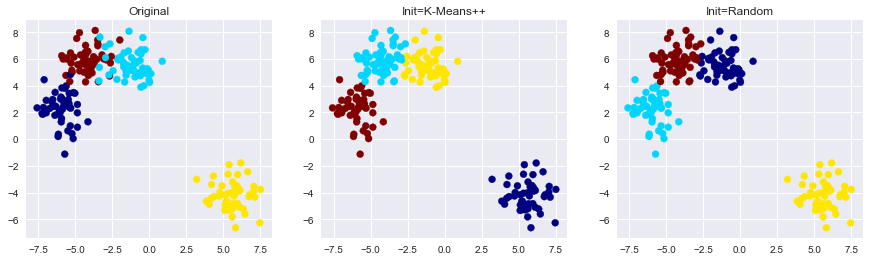

In [34]:
t1b_kmeanspp = KMeans(n_clusters=4, init="k-means++", random_state=1234)
t1b_kmeanspp_cluster_assignments = t1b_kmeanspp.fit(t1b_data).labels_

t1b_kmeans_random = KMeans(n_clusters=4, init="random", random_state=1234)
t1b_kmeans_random_cluster_assignments = t1b_kmeans_random.fit(t1b_data).labels_

part1_plot_clustering(t1b_data, t1b_ground_truth, t1b_kmeanspp_cluster_assignments, 
                      t1b_kmeans_random_cluster_assignments)

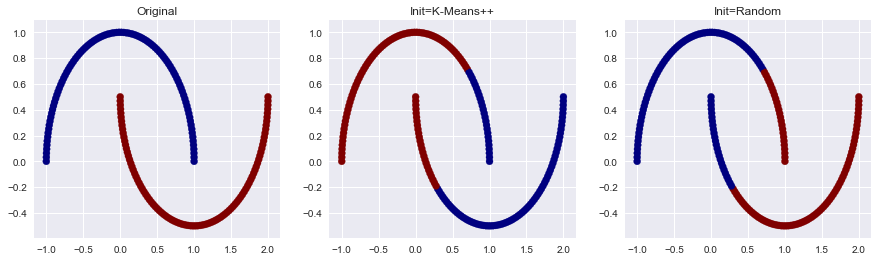

In [37]:
t1g_data, t1g_ground_truth = datasets.make_moons(n_samples=200, random_state=1234)
t1g_kmeanspp = KMeans(n_clusters=2, init="k-means++", random_state=1234)
t1g_kmeanspp_cluster_assignments = t1g_kmeanspp.fit(t1g_data).labels_
t1g_kmeans_random = KMeans(n_clusters=2, init="random", random_state=1234)
t1g_kmeans_random_cluster_assignments = t1g_kmeans_random.fit(t1g_data).labels_
part1_plot_clustering(t1g_data, t1g_ground_truth, t1g_kmeanspp_cluster_assignments, 
                      t1g_kmeans_random_cluster_assignments)

In [48]:
def compute_ssq(data, k, kmeans):
    dist = np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)
    tot_withinss = sum(dist**2) # Total within-cluster sum of squares
    totss = sum(pdist(data)**2) / data.shape[0] # The total sum of squares
    betweenss = totss - tot_withinss # The between-cluster sum of squares
    return betweenss/totss*100
    
#Given a data (as nxm matrix) and an array of ks, this returns the SSQ (sum of squared distances)
# SSQ is also called as SSD or SSE


def ssq_statistics(data, ks, ssq_norm=True):
    ssqs = sp.zeros((len(ks),)) # array for SSQs (lenth ks)
    
    for (i,k) in enumerate(ks): # iterate over the range of k values
        kmeans = KMeans(n_clusters=k, random_state=1234).fit(data)
        
        if ssq_norm:
            ssqs[i] = compute_ssq(data, k, kmeans)
        else:
            # The sum of squared error (SSQ) for k
            ssqs[i] = kmeans.inertia_
    return ssqs

#This function computes the Gap statistic of the data (given as a nxm matrix)
# Returns:
#    gaps: an array of gap statistics computed for each k.
#    errs: an array of standard errors (se), with one corresponding to each gap computation.
#    difs: an array of differences between each gap_k and the sum of gap_k+1 minus err_k+1.

# The gap statistic measures the difference between within-cluster dispersion on an input
#  dataset and that expected under an appropriate reference null distribution.
# If you did not fully understand the definition, no worry - it is quite complex anyway :)
# However, you should know how to USE the gap statistic if not how it is computed
def gap_statistics(data, refs=None, nrefs=20, ks=range(1,11)):
    
    sp.random.seed(1234)
    shape = data.shape
    dst = sp.spatial.distance.euclidean
    
    if refs is None:
        tops = data.max(axis=0) # maxima along the first axis (rows)
        bots = data.min(axis=0) # minima along the first axis (rows)
        dists = sp.matrix(sp.diag(tops-bots)) # the bounding box of the input dataset
        
        # Generate nrefs uniform distributions each in the half-open interval [0.0, 1.0)
        rands = sp.random.random_sample(size=(shape[0],shape[1], nrefs))
        
        # Adjust each of the uniform distributions to the bounding box of the input dataset
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs
        
    gaps = sp.zeros((len(ks),))   # array for gap statistics (lenth ks)
    errs = sp.zeros((len(ks),))   # array for model standard errors (length ks)
    difs = sp.zeros((len(ks)-1,)) # array for differences between gaps (length ks-1)

    for (i,k) in enumerate(ks): # iterate over the range of k values
        # Cluster the input dataset via k-means clustering using the current value of k
        try:
            (kmc,kml) = sp.cluster.vq.kmeans2(data, k)
        except LinAlgError:
            kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(data)
            (kmc, kml) = kmeans.cluster_centers_, kmeans.labels_

        # Generate within-dispersion measure for the clustering of the input dataset
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        # Generate within-dispersion measures for the clusterings of the reference datasets
        refdisps = sp.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            # Cluster the reference dataset via k-means clustering using the current value of k
            try:
                (kmc,kml) = sp.cluster.vq.kmeans2(rands[:,:,j], k)
            except LinAlgError:
                kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(rands[:,:,j])
                (kmc, kml) = kmeans.cluster_centers_, kmeans.labels_

            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])

        # Compute the (estimated) gap statistic for k
        gaps[i] = sp.mean(sp.log(refdisps) - sp.log(disp))

        # Compute the expected error for k
        errs[i] = sp.sqrt(sum(((sp.log(refdisp)-sp.mean(sp.log(refdisps)))**2) \
                            for refdisp in refdisps)/float(nrefs)) * sp.sqrt(1+1/nrefs)

    # Compute the difference between gap_k and the sum of gap_k+1 minus err_k+1
    difs = sp.array([gaps[k] - (gaps[k+1]-errs[k+1]) for k in range(len(gaps)-1)])

    #print "Gaps: " + str(gaps)
    #print "Errs: " + str(errs)
    #print "Difs: " + str(difs)

    return gaps, errs, difs

In [50]:
#Interpreting the charts:
#  Elbow method: http://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method
#  Gap Statistics: $k$ where the first drop in trend happens
#  Gap Statistics differences: $k$ where you get the first positive values
def t1j_plot_clustering_statistics(data, k_min, k_max):
 
    plt.figure()
    fig,axes = plt.subplots(1, 4, figsize=(16, 4))
    ks = range(k_min, k_max+1)
    
    #Change below: plot the data distribution as a scatter plot on axes[0] variable
    # For now ignore the color field. We will use data where #clusters is easy to see
    axes[0].scatter(data[:, 0], data[:, 1])
    axes[0].set_title("Original Data")
    
    #range(a,b) returns a .. b-1
    ssqs = ssq_statistics(data, ks=ks)
    #Change below: create a line chart with x axis as different k values 
    #  and y-axis as ssqs on axes[1] variable
    axes[1].plot(ks, ssqs)
    axes[1].set_title("Elbow Method and SSQ")
    axes[1].set_xlabel("$k$")
    axes[1].set_ylabel("SSQ")
  
    
    
    #Do not change anything below for the rest of the function
    # Code courtesy: Reid Johnson from U. of Notre Dame
    gaps, errs, difs = gap_statistics(data, nrefs=25, ks=ks)
    
    max_gap = None
    if len(np.where(difs > 0)[0]) > 0:
        max_gap = np.where(difs > 0)[0][0] + 1 # the k with the first positive dif
    if max_gap:
        print ("By gap statistics, optimal k seems to be ", max_gap)
    else:
        print ("Please use some other metrics for finding k")
        
     #Create an errorbar plot
    rects = axes[2].errorbar(ks, gaps, yerr=errs, xerr=None, linewidth=1.0)

    #Add figure labels and ticks
    axes[2].set_title('Clustering Gap Statistics')
    axes[2].set_xlabel('Number of clusters k')
    axes[2].set_ylabel('Gap Statistic')
    axes[2].set_xticks(ks)
    # Add figure bounds
    axes[2].set_ylim(0, max(gaps+errs)*1.1)
    axes[2].set_xlim(0, len(gaps)+1.0)

    ind = range(1,len(difs)+1) # the x values for the difs
    
    max_gap = None
    if len(np.where(difs > 0)[0]) > 0:
        max_gap = np.where(difs > 0)[0][0] + 1 # the k with the first positive dif

    #Create a bar plot
    axes[3].bar(ind, difs, alpha=0.5, color='g', align='center')

    # Add figure labels and ticks
    if max_gap:
        axes[3].set_title('Clustering Gap Differences\n(k=%d Estimated as Optimal)' % (max_gap))
    else:
        axes[3].set_title('Clustering Gap Differences\n')
    axes[3].set_xlabel('Number of clusters k')
    axes[3].set_ylabel('Gap Difference')
    axes[3].xaxis.set_ticks(range(1,len(difs)+1))

    #Add figure bounds
    axes[3].set_ylim(min(difs)*1.2, max(difs)*1.2)
    axes[3].set_xlim(0, len(difs)+1.0)

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/scipy/cluster/vq.py:653: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


By gap statistics, optimal k seems to be  2
By gap statistics, optimal k seems to be  5


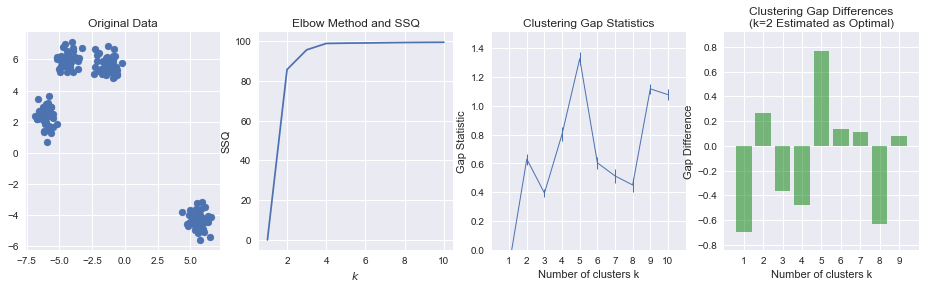

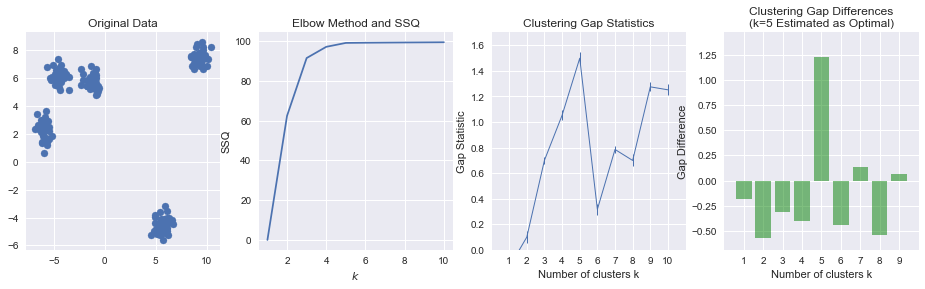

In [51]:
t1j_data, t1j_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=4, 
                                                 cluster_std=0.5, random_state=1234)
t1j_plot_clustering_statistics(t1j_data, 1, 10)

t1j_data, t1j_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=5,
                                                 cluster_std=0.5, random_state=1234)
t1j_plot_clustering_statistics(t1j_data, 1, 10)

In [52]:
def part2_plot_clustering(original_data, original_cluster_assignments, 
                              ward_linkage_cluster_assignments, complete_linkage_cluster_assignments, 
                              average_linkage_cluster_assignments):
    plt.figure()
    fig,axes = plt.subplots(1, 4, figsize=(16,4))    

    axes[0].scatter(original_data[:,0], original_data[:,1], c=original_cluster_assignments)
    axes[0].set_title('Original')
       
    axes[1].scatter(original_data[:,0], original_data[:,1], c=ward_linkage_cluster_assignments)
    axes[1].set_title('Ward Linkage')
    
    axes[2].scatter(original_data[:,0], original_data[:,1], c=complete_linkage_cluster_assignments)
    axes[2].set_title('Complete Linkage')
    
    axes[3].scatter(original_data[:,0], original_data[:,1], c=average_linkage_cluster_assignments)
    axes[3].set_title('Average Linkage')    

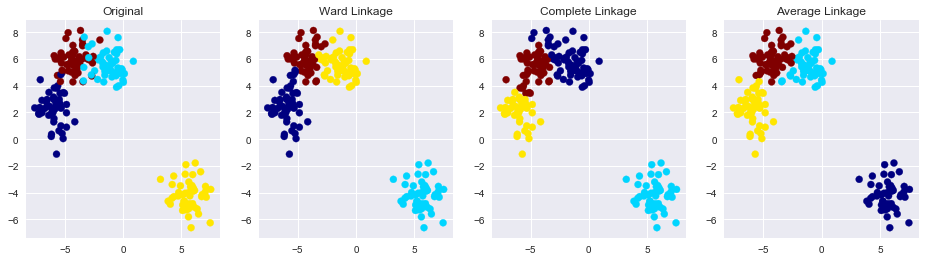

In [53]:
t2b_data, t2b_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=4, 
                                                 cluster_std=1.0, random_state=1234)


t2b_agg_ward = AgglomerativeClustering(n_clusters=4, linkage="ward")
t2b_ward_linkage_cluster_assignments = t2b_agg_ward.fit(t2b_data).labels_


t2b_agg_complete = AgglomerativeClustering(n_clusters=4, linkage="complete") 
t2b_complete_linkage_cluster_assignments = t2b_agg_complete.fit(t2b_data).labels_

t2b_agg_average = AgglomerativeClustering(n_clusters=4, linkage="average") 
t2b_average_linkage_cluster_assignments = t2b_agg_average.fit(t2b_data).labels_


part2_plot_clustering(t2b_data, t2b_ground_truth, t2b_ward_linkage_cluster_assignments, 
                            t2b_complete_linkage_cluster_assignments, t2b_average_linkage_cluster_assignments)

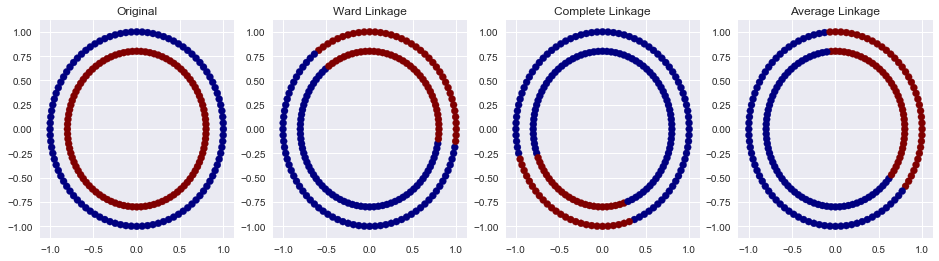

In [54]:
t2c_data, t2c_ground_truth = datasets.make_circles(n_samples=200, random_state=1234) 

#Change below: Call AgglomerativeClustering with 2 clusters with ward linkage
t2c_agg_ward = AgglomerativeClustering(n_clusters=2, linkage="ward")
#Change below: Find the cluster assignments for the data
t2c_ward_linkage_cluster_assignments = t2c_agg_ward.fit(t2c_data).labels_

#Change below: Call AgglomerativeClustering with 2 clusters with complete linkage
t2c_agg_complete = AgglomerativeClustering(n_clusters=2, linkage="complete") 
#Change below: Find the cluster assignments for the data
t2c_complete_linkage_cluster_assignments = t2c_agg_complete.fit(t2c_data).labels_

#Change below: Call AgglomerativeClustering with 2 clusters with average linkage
t2c_agg_average = AgglomerativeClustering(n_clusters=2, linkage="average") 
#Change below: Find the cluster assignments for the data
t2c_average_linkage_cluster_assignments = t2c_agg_average.fit(t2c_data).labels_


part2_plot_clustering(t2c_data, t2c_ground_truth, t2c_ward_linkage_cluster_assignments, 
                            t2c_complete_linkage_cluster_assignments, t2c_average_linkage_cluster_assignments)

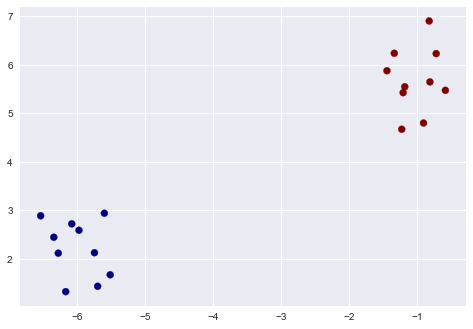

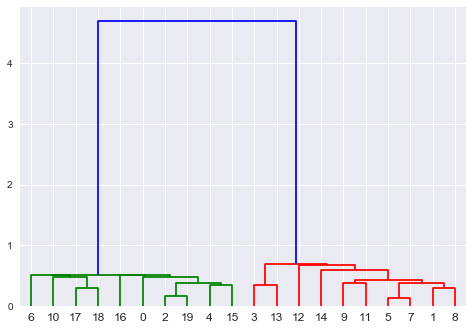

In [55]:
t2e_data, t2e_ground_truth = datasets.make_blobs(n_samples=20, n_features=2, centers=2, cluster_std=0.5, 
                                                 random_state=1234)
plt.figure()
plt.scatter(t2e_data[:, 0], t2e_data[:, 1], c=t2e_ground_truth)
plt.show()

#compute the pairwise distance 
t2e_data_dist = pdist(t2e_data)
#compute the linkage 
t2e_data_linkage = linkage(t2e_data_dist) 
#plot the dendrogram 
t2e_data_dendrogram = dendrogram(t2e_data_linkage)


# Ground Truth Cluster Assigments

* Adjusted Rand index
* Adjusted Mutual Information Score
* Homogeneity
* Completeness
* V-measure score

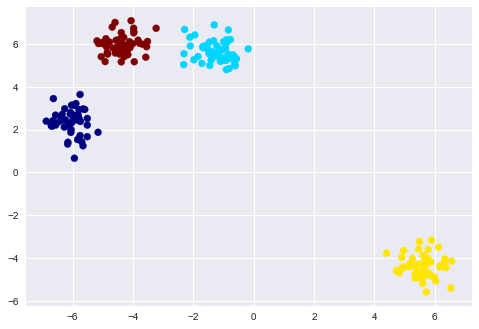

In [56]:
t3_data, t3_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=1234)

t3_k_min = 1
t3_k_max = 10
t3_ind = range(t3_k_min, t3_k_max+1)


plt.figure()
plt.scatter(t3_data[:, 0], t3_data[:, 1], c=t3_ground_truth)
plt.show()

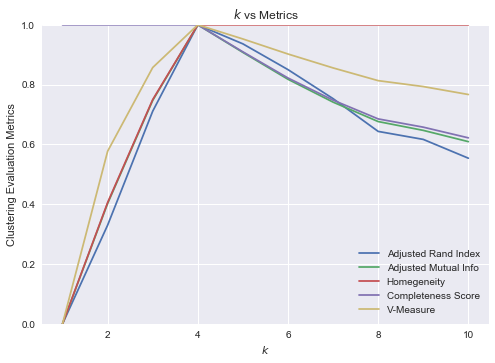

In [57]:
t3a_adjusted_rand_index_scores = [0 for _ in t3_ind]
t3a_adjusted_mutual_info_scores = [0 for _ in t3_ind]
t3a_adjusted_homogeneity_scores = [0 for _ in t3_ind]
t3a_adjusted_completeness_scores = [0 for _ in t3_ind]
t3a_adjusted_v_measure_scores = [0 for _ in t3_ind]

for k in t3_ind:
    
    #Change below: Call KMeans with k clusters with k-means++ initialization and random state of 1234 
    t3a_kmeanspp = KMeans(n_clusters=k, init="k-means++", random_state=1234)
    #Change below: Find the cluster assignments for the data
    t3a_kmeanspp_cluster_assignments = t3a_kmeanspp.fit(t3_data).labels_
    
    #Now let us compute the clustering score for each metric (use metrics.xyz for getting function xyz)
    # Watch out for the argument order (true, predicted)
    
    #Change below: compute the score based on ADJUSTED random index
    t3a_adjusted_rand_index_scores[k-1] = metrics.adjusted_rand_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on ADJUSTED mutual information score
    t3a_adjusted_mutual_info_scores[k-1] = metrics.adjusted_mutual_info_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on homogeneity score
    t3a_adjusted_homogeneity_scores[k-1] = metrics.homogeneity_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on completeness index
    t3a_adjusted_completeness_scores[k-1] = metrics.completeness_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on v-measure index
    t3a_adjusted_v_measure_scores[k-1] = metrics.v_measure_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    

plt.figure()
plt.plot(t3_ind, t3a_adjusted_rand_index_scores, label="Adjusted Rand Index")
plt.plot(t3_ind, t3a_adjusted_mutual_info_scores, label="Adjusted Mutual Info")
plt.plot(t3_ind, t3a_adjusted_homogeneity_scores, label="Homegeneity")
plt.plot(t3_ind, t3a_adjusted_completeness_scores, label="Completeness Score")
plt.plot(t3_ind, t3a_adjusted_v_measure_scores, label="V-Measure")

plt.title("$k$ vs Metrics")
plt.xlabel("$k$")
plt.ylabel("Clustering Evaluation Metrics")
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

# Truth Cluster Assigments NOT Available

* SSQ
* Silhoutte Coefficient
* Stability

In [63]:
#The following function computes pairwise stability of a list of clusterings
# the mean similarity between the clusterings as defined by a particular similarity metric. 
# In this case we use the Adjusted Rand Index to calculate the similarities.
def calc_pairwise_stability( clusterings, metric ):
    sim_values = []
    for i in range(len(clusterings)):
        for j in range(i+1,len(clusterings)):
            sim_values.append( metric( clusterings[i], clusterings[j] ) )
    return np.array( sim_values ).mean()

#Given data, take a sample, run k-means on it, make predictions
def t3_kmeans_sample( X, k, sampling_ratio ):
    # create a matrix with subset of samples
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle( indices )
    n_subset = int(n_samples * sampling_ratio) 
    X_subset = X[indices[0:n_subset]] 
    # cluster the subset
    clusterer = KMeans(n_clusters=k, n_init=1, init='random', max_iter = 100)
    clusterer.fit(X_subset)
    # produce an assignment for all samples
    return clusterer.predict(X)

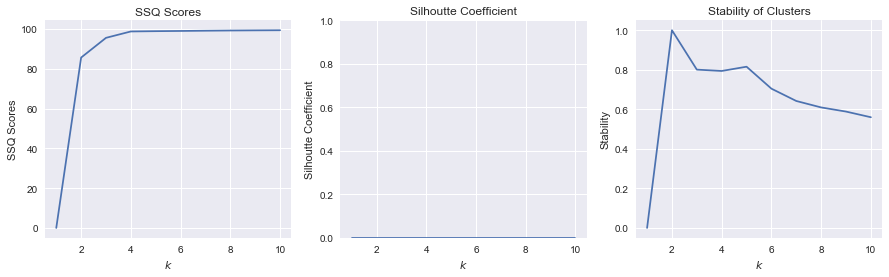

In [72]:
t3b_ssq_scores = [0 for _ in t3_ind]
t3b_silhoutte_coefficient_scores = [0 for _ in t3_ind]
t3b_stability_scores = [0 for _ in t3_ind]

for k in t3_ind:
    
    # Call KMeans with k clusters with k-means++ initialization and random state of 1234 
    t3b_kmeanspp = KMeans(n_clusters=k, init="k-means++", random_state=1234)
    # fit t3b_kmeanspp to data
    t3b_kmeanspp_fitted = t3b_kmeanspp.fit(t3_data)
    # Find the cluster assignments for the data
    t3b_kmeanspp_cluster_assignments = t3b_kmeanspp_fitted.labels_
    
    
    # compute the clustering score for each metric (use metrics.xyz for getting function xyz)
    # Watch out for the argument order (true, predicted)
    
    # compute ssq score using compute_ssq function
    t3b_ssq_scores[k-1] = compute_ssq(t3_data, k, t3b_kmeanspp_fitted)
    
    # compute the score based on silhouette_score with a sample size of 50
    #Note: do not set random state here - else it will give a constant score
    # Your results might look quite different from mine
    #t3b_silhoutte_coefficient_scores[k-1] = metrics.silhouette_score(t3_data, t3b_kmeanspp_cluster_assignments,sample_size=30) 
    
    #compute the score based on stability score
    if k == 1: #Stability is defined for k >= 2
        continue
    
    #Run k-means on a small sample , make predictions based on the sample centroids and see how stable they are
    np.random.seed(1234)
    t3b_stability_clusterings = [t3_kmeans_sample( t3_data, k, 0.5 ) for run in range(10)]
    t3b_stability_scores[k-1] = calc_pairwise_stability(t3b_stability_clusterings, metrics.adjusted_rand_score)
        
    


plt.figure()
fig,axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(t3_ind, t3b_ssq_scores)
axes[0].set_title('SSQ Scores')
axes[0].set_xlabel('$k$')
axes[0].set_ylabel('SSQ Scores')

axes[1].plot(t3_ind, t3b_silhoutte_coefficient_scores)
axes[1].set_title('Silhoutte Coefficient')
axes[1].set_xlabel('$k$')
axes[1].set_ylabel('Silhoutte Coefficient')
axes[1].set_ylim( (0.0, 1.0) )

axes[2].plot(t3_ind, t3b_stability_scores)
axes[2].set_title('Stability of Clusters')
axes[2].set_xlabel('$k$')
axes[2].set_ylabel('Stability')

plt.show()